# Tutorial 10

**CS3481 Fundamentals of Data Science**

*Semester B 2019/20*
___
**Instructions:**
- same as [Tutorial 1](http://bit.ly/CS3481T1).
___

## Exercise 1 (submit via [uReply](https://cityu.ed2.mobi/student/mobile_index.php) section number **LM1158**)

  For this question, you will use WEKA to cluster the iris dataset. We want to evaluate different clustering algorithms based on whether they can identify the three different types of iris as clusters without looking at the class attribute.

(a) Follow the procedures below to cluster the `iris.2D` dataset.
1. Load the iris.2D.arff. 
1. In the `cluster panel`, choose the $k$-means clustering algorithm by selecting `SimpleKMeans` as the `clusterer`. 
1. The default number of clusters is $k=2$. Change it to $k=3$ instead, i.e., set `numClusters` to 3. 
1. To ignore the class attribute, click the `ignore attributes` button below `Cluster mode` and select `class`. 
1. Run the clustering algorithm. 

What are the cluster centers and the within cluster sum of squared (WSS) errors?


___
**Answer:**
___

(b) Run again without ignoring the class attribute. Does the within cluster sum of squared error increase? Why?

[*Hint: How to calculate the distance between data points with the class attribute?*]

___
**Answer:**
___

(c) Right click on your run result (with class attribute ignored) and click `visualize cluster assignments`. Does the $k$-means algorithm appear to return the global optimal solution that minimizes WSS? Can $k$-means algorithm identify the three types of iris?

___
**Answer:**
___

(d) Select `classes to clusters evaluation` as the `cluster mode` instead.  What is the percentage of incorrectly clustered instances?  How is this number calculated?

## Exercise 2 (no submission required)

For this question, compute the clustering solution by hand for the following dataset using centroid based method with $k=2$.

|  |$Z_1$|$Z_2$|
|--|-----|-----|
|1.|0    |0    |
|2.|0    |1    |
|3.|1    |0    |
|4.|1    |1    |
|5.|2    |0    |
|6.|2    |1    |

(a) Give the optimal clustering solution (both the cluster centers and cluster assignments) for the data points with min-max normalization on the attributes. What is the minimum WSS?


___
**Answer:**
___

(b) Is it possible that the $k$-means algorithm fails to converge to the optimal solution? Explain your answer.

___
**Answer:**
___

(c) Does the optimal clustering solution remain unchanged without min-max normalization on the attributes? If not, give the optimal solution.

___
**Answer:**
___

## Exercise 3 (Optional)

Generate the `iris.2D` dataset.

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:,[0,2]]
Y = iris['target']

X.shape, Y.shape # show the dimensions of the input features and target

((150, 2), (150,))

Apply min-max normalization to the input attributes.

In [0]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minmax_norm = MinMaxScaler()
X_ = minmax_norm.fit_transform(X)
np.min(X_,axis=0), np.max(X_,axis=0)

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

Apply the $k$-means clustering algorithm. (Note that, by default, $k$-means++ is used to intelligently select initial cluster centers far away from each other to speed up convergence.)

In [0]:
from sklearn.cluster import KMeans
kmeans_clr = KMeans(n_clusters=3)
kmeans_clr.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Plot the clusters and compare it to the ground truth.

Text(0.5, 1.0, 'Class (ground truth)')

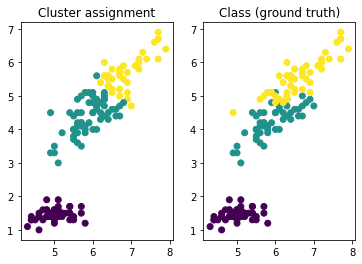

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=kmeans_clr.labels_)
plt.title("Cluster assignment")
plt.subplot(122)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title("Class (ground truth)")

**Exercise** Return the accuracy using class-to-cluster evaluation.

**Exercise** Verify your answer to Exercise 2.